In [36]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import os

In [37]:
jnj = pd.read_csv(os.path.join(os.curdir, 'data', 'JNJ_history.csv'), index_col='Date', parse_dates=True)

In [38]:
prices = (jnj['High'] + jnj['Low'])/2
prices

Date
2017-07-20    136.350
2017-07-19    134.965
2017-07-18    133.015
2017-07-17    132.340
2017-07-14    132.370
               ...   
2014-07-25    102.100
2014-07-24    102.375
2014-07-23    102.405
2014-07-22    102.160
2014-07-21    101.300
Length: 757, dtype: float64

In [39]:
std_20 = prices.rolling(20).std()
mavg_20 = prices.rolling(20).mean()

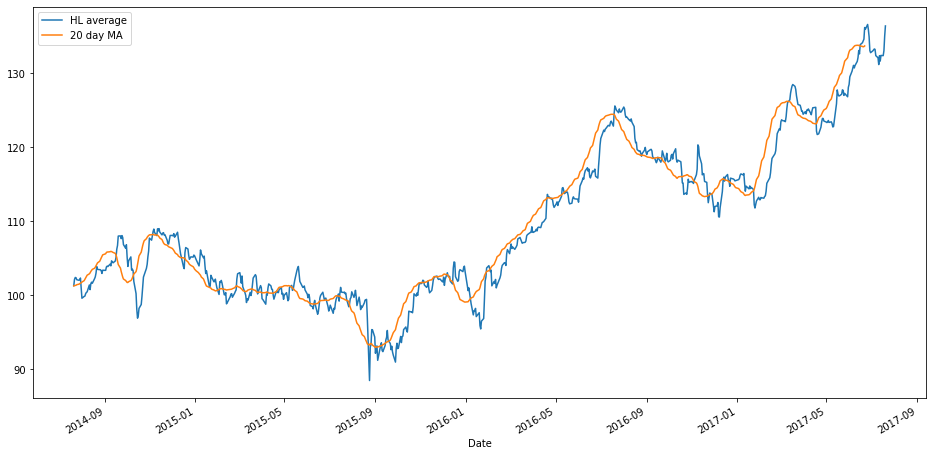

In [40]:
prices.plot(label='HL average', figsize=(16, 8))
mavg_20.plot(label='20 day MA')
plt.legend()

In [41]:

lower_band = mavg_20 - (2 * std_20)
upper_band = mavg_20 + (2 * std_20)

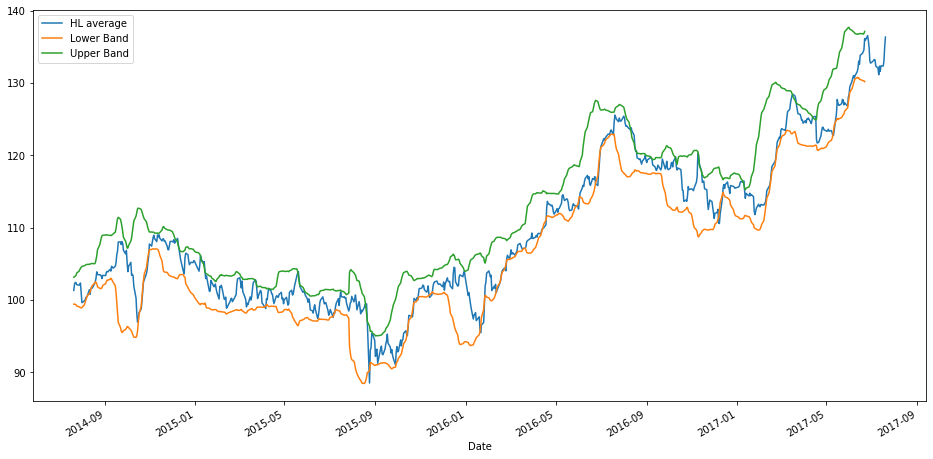

In [42]:
prices.plot(label='HL average', figsize=(16, 8))
lower_band.plot(label='Lower Band')
upper_band.plot(label='Upper Band')
plt.legend()

## Code for Backtesting:

In [ ]:
from zipline.api import(    symbol,
                            order_target_percent,
                            schedule_function,
                            date_rules,
                            time_rules,
                       )


def initialize(context):

    context.jnj = symbol('JNJ')

    schedule_function(handle_data, date_rules.every_day())


def handle_data(context, data):
    jnj = context.jnj
    cur_price = data.current(jnj, 'price')  # Current price

    prices = data.history(jnj, 'price', 20, '1d')   # Historical prices
    
    avg = prices.mean()     # 20 day MA
    std = prices.std()      # 20 day std

    lower_band = avg - (2 * std)
    upper_band = avg + (2 * std)
    
    if cur_price <= lower_band:
        # Long 100%
        order_target_percent(jnj, 1.0)
        print('Buying @ ' + str(cur_price))

    elif cur_price >= upper_band:
        # Short 100%
        order_target_percent(jnj, -1.0)
        print('Selling @ ' + str(cur_price))
    else: 
        pass